Notebook Color Schemes:


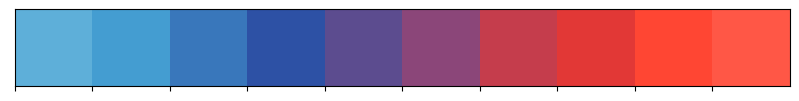

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches
import numpy as np
import plotly 
import plotly.express as px

class clr:
    S = '\033[1m' + '\033[94m'
    E = '\033[0m'
    
    
my_colors = ["#5EAFD9", "#449DD1", "#3977BB", 
             "#2D51A5", "#5C4C8F", "#8B4679",
             "#C53D4C", "#E23836", "#FF4633", "#FF5746"]

print(clr.S+"Notebook Color Schemes:"+clr.E)
sns.palplot(sns.color_palette(my_colors))
plt.show()

In [3]:
def get_excel_information(df,name):
    print(clr.S+f"======  Basic Info of {name} Data : ======"+clr.E)
    print(clr.S+"Total Missing Values : "+clr.E,df.isnull().sum().sum())
    print(clr.S+"Columns = "+clr.E,list(df.columns),"\n\n")

In [4]:
train_data = pd.read_excel("/kaggle/input/procom23-data-science-competition-round-1/train_data.xlsx")
test_data = pd.read_excel("/kaggle/input/procom23-data-science-competition-round-1/test_data.xlsx")

## Basic Info:

In [5]:
get_excel_information(train_data, "Train")

======  Basic Info of Train Data : ======
Total Missing Values :  2550
Columns =  ['ID', 'Price', 'Boat Type', 'Manufacturer', 'Type', 'Year Built', 'Length', 'Width', 'Material', 'Location', 'Number of views last 7 days'] 




In [6]:
get_excel_information(test_data, "Test")

======  Basic Info of Test Data : ======
Total Missing Values :  644
Columns =  ['ID', 'Price', 'Boat Type', 'Manufacturer', 'Type', 'Year Built', 'Length', 'Width', 'Material', 'Location'] 




#### Interpretaion:

* as we see that, Train data have 2550 missing values which can be harmful for our ML Models and we have 11 columns in Train data.

* Now back to the test data and it have 644 missing values which can also be harmful for our ML Models and we have 10 columns in Test data and the reason is that Test does not have prediction column, we have to find this out.

In [7]:
train_data.describe()

,ID,Year Built,Length,Width,Number of views last 7 days
count,7910.000000,7910.000000,7905.000000,7867.000000,7910.000000
mean,3954.500000,1894.840202,11.580548,3.521548,150.048546
std,2283.564648,456.847589,6.084230,1.231082,154.485964
min,0.000000,0.000000,1.150000,0.010000,15.000000
25%,1977.250000,1996.000000,7.470000,2.540000,70.000000
50%,3954.500000,2007.000000,10.220000,3.320000,108.000000
75%,5931.750000,2017.000000,13.900000,4.250000,173.000000
max,7909.000000,2021.000000,100.000000,25.160000,3263.000000


#### **important point to note:**

* The above command df.describe() helps us to view the statistical properties of numerical variables. It excludes character variables.

* If we want to view the statistical properties of character variables, we should run the following command -

       train_data.describe(include=['object'])

* If we want to view the statistical properties of all the variables, we should run the following command -

         train_data.describe(include='all')
    

#### **Key Points to Consider:**

From Checking above Statistical Properties of the train data we concluded that: 

* Length and Width have outliers
* There are some categorical data which can be useful for feature engineering. 

## CHECKING DTYPES IN WHOLE TRAIN DATA:

<AxesSubplot:title={'center':'DTYPES PERCENTAGE'}, ylabel='None'>

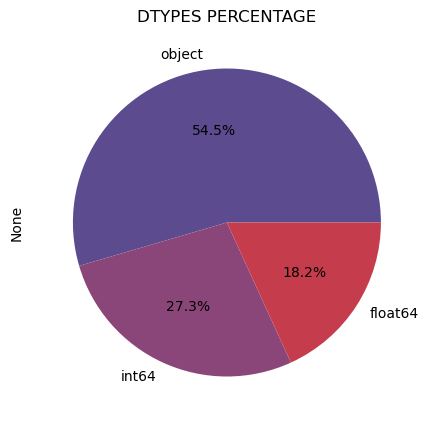

In [8]:
plt.figure(figsize=(6,5))
plt.title("DTYPES PERCENTAGE")
plt.ylabel(" ")
train_data.dtypes.value_counts().plot(kind='pie',autopct="%.1f%%",colors=[my_colors[4],my_colors[5],my_colors[6]])

## Shape of Train and Test:

In [9]:
# Printing the Shape of the Train and Tet data to find data's instances and features.

print(f'The Shpae of the Train data : {train_data.shape}')
print(f'The Shpae of the Test data : {test_data.shape}')

The Shpae of the Train data : (7910, 11)
The Shpae of the Test data : (1978, 10)


## Checking Nan Columns

In [26]:
print(clr.S+" --- Count of Nan's in Every Column --- "+clr.E)
train_data.isnull().sum()

 --- Count of Nan's in Every Column --- 


ID                                0
Price                             0
Boat Type                         0
Manufacturer                   1086
Type                              6
Year Built                        0
Length                            5
Width                            43
Material                       1388
Location                         22
Number of views last 7 days       0
dtype: int64

In [34]:
def Nan_counts(df,name):
    plt.figure(figsize=(14,16))
    graph = sns.displot(data=df.isna().melt(value_name='missing'), y='variable',hue='missing',aspect=2.0,multiple='fill',palette=["#9b59b6", "#ff0000"])
    graph.set(ylabel='Features')
    plt.title(f"NAN COUNTS IN {name} DATA")

<Figure size 1400x1600 with 0 Axes>

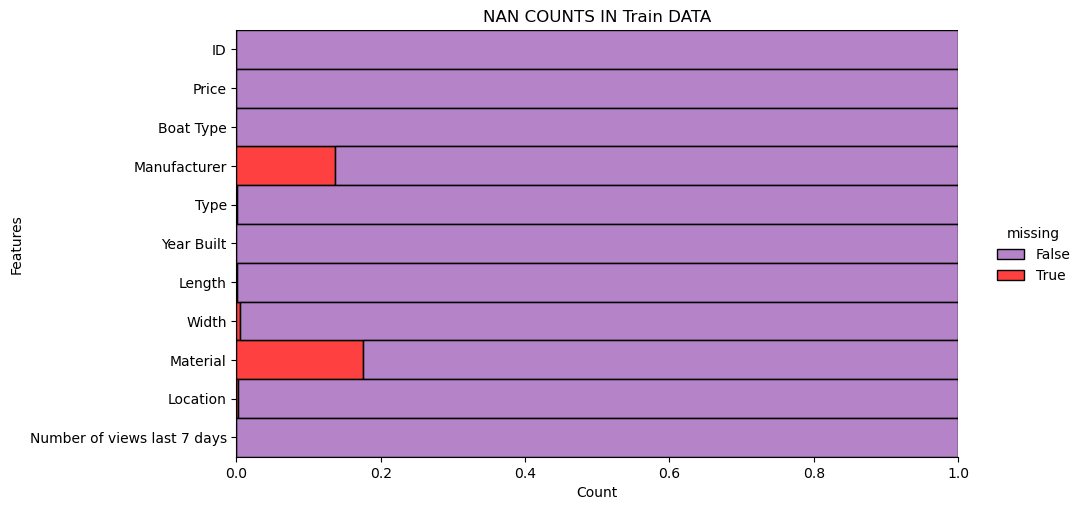

<Figure size 1400x1600 with 0 Axes>

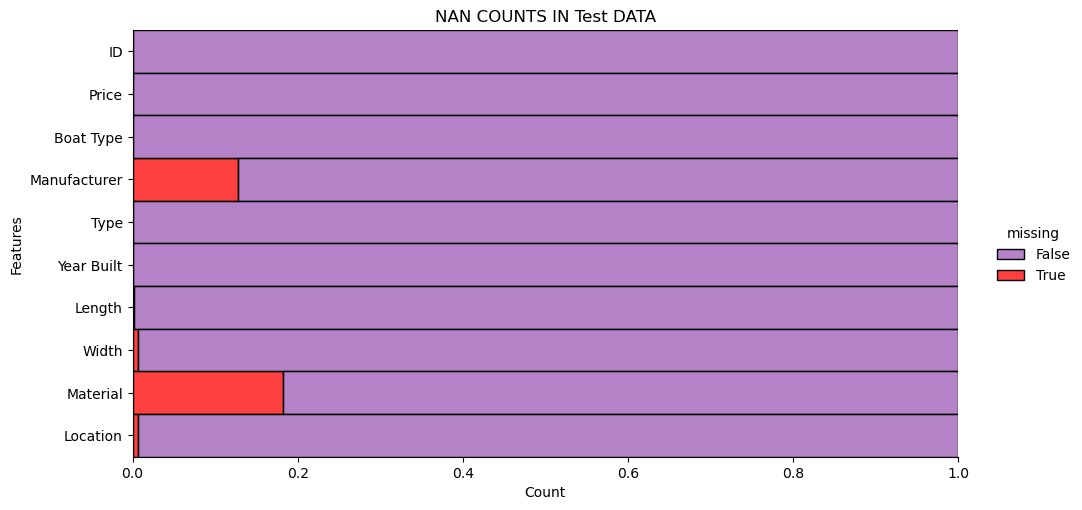

In [35]:
Nan_counts(train_data,"Train")
Nan_counts(test_data,"Test")

In [36]:
print(clr.S+"Percentage of Nan columns in Train data "+clr.E)
round(train_data.isnull().sum() / len(train_data) * 100,2)

Percentage of Nan columns in Train data 


ID                              0.00
Price                           0.00
Boat Type                       0.00
Manufacturer                   13.73
Type                            0.08
Year Built                      0.00
Length                          0.06
Width                           0.54
Material                       17.55
Location                        0.28
Number of views last 7 days     0.00
dtype: float64

#### **Interpretaion:**

* we can see that we have slight Nans in half of the columns.

* We do not drop the Column Manufacturer, Type, Length, Width, Material and Location because we have low percentage of Nan in Columns 

* We Will Use Imputation Techniques to Fill the Nan Columns. we will discuss it later :)



## Checking Duplicates on Train

In [42]:
print(clr.S+f"Duplicate Data Count : {len(train_data[train_data.duplicated()])}"+clr.E)

Duplicate Data Count : 0


## Checking Duplicates on Test

In [44]:
print(clr.S+f"Duplicate Data Count : {len(test_data[test_data.duplicated()])}"+clr.E)

Duplicate Data Count : 0


## Checking Correlation between every feature

* we added a condition that if some correlation > 0.5 should be on highly correlated list

<AxesSubplot:>

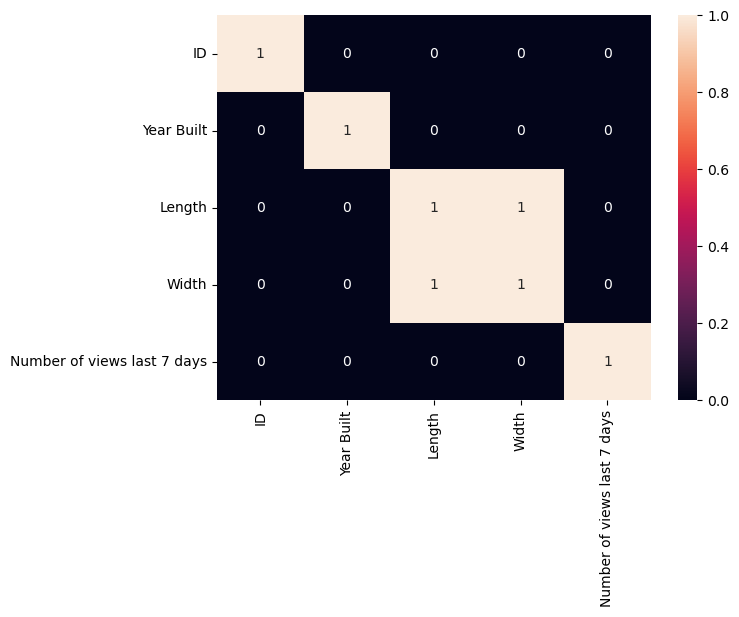

In [49]:
plt.figure(figsize=(7,5))
sns.heatmap(train_data.corr()>0.5,annot=True)

## For Plotting purpose we extract Numeric data

In [190]:
numeric_data = train_data.select_dtypes(exclude=['object']).copy()

numeric_data.head()

,ID,Year Built,Length,Width,Number of views last 7 days
0,0,2007,17.00,4.65,26
1,1,2008,9.30,3.20,49
2,2,2002,9.80,3.00,187
3,3,2006,18.87,4.90,27
4,4,2006,14.65,4.36,145


## **KDE Plot for checking Skewness**

we first check the skewness of all the numerical columns and confirm that which columns have skewed data.

After doing this, then we check them carefully one by one.

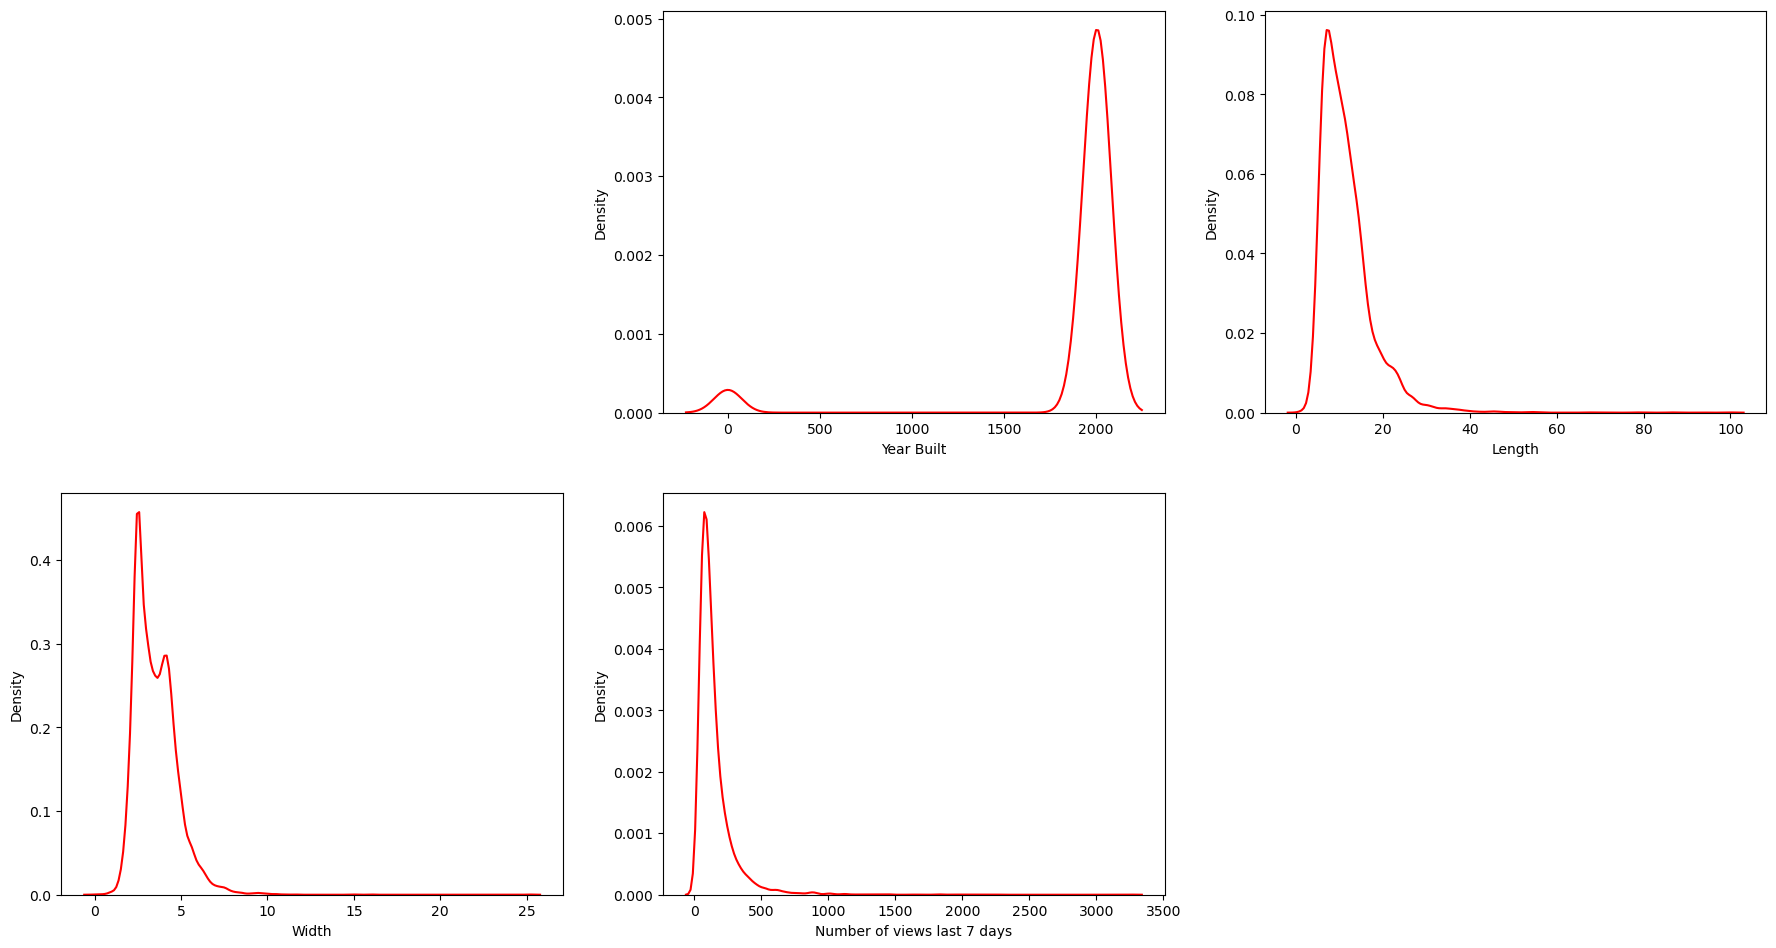

In [131]:
plt.figure(figsize=(22,24))
for ind, col in enumerate(numeric_data):
    if col != 'ID':
        plt.subplot(4,3,ind+1)
        sns.kdeplot(train_data.loc[:,col],color='red')

## **CHECKING SKEWNESS**

In [56]:
numeric_data.skew(skipna=True).sort_values(ascending=False)

Number of views last 7 days    5.638740
Length                         2.895020
Width                          1.961486
ID                             0.000000
Year Built                    -3.902387
dtype: float64

#### Concluded:
* As we see that Length and Width have the possibility to have the outliers because of their skewed diagram and we also find out this in above describe() function part that they have outliers by checking the statistical data of that dataset.

#### **Checking Length Column:**

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  


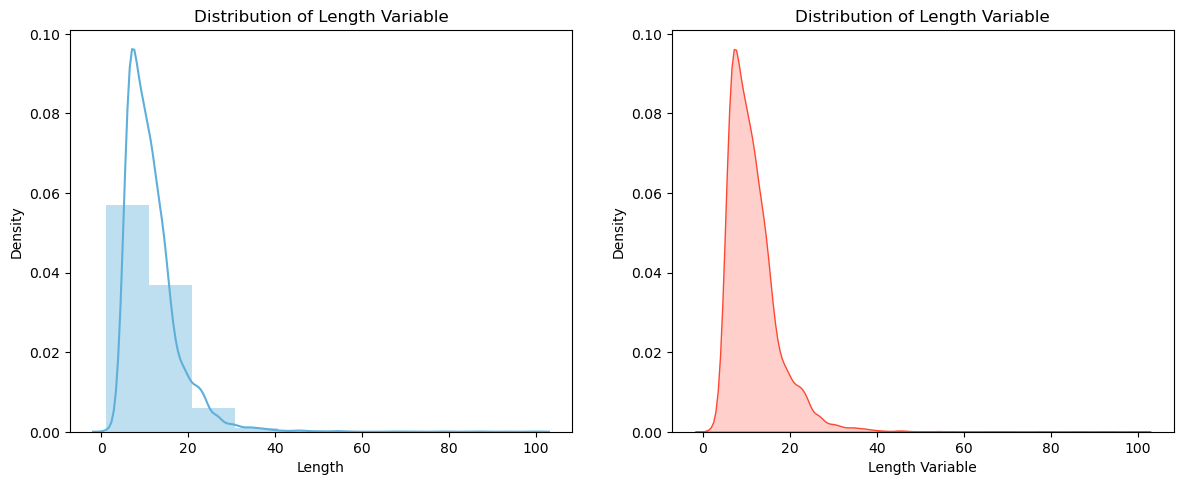

In [57]:
plt.figure(figsize=(22,24))
temp = numeric_data['Length']
x = pd.Series(temp,name='Length Variable')
plt.subplot(4,3,1)
ax = sns.distplot(temp,bins=10,color=my_colors[0])
ax.set_title("Distribution of Length Variable")
plt.subplot(4,3,2)
ax = sns.kdeplot(x,shade=True,color=my_colors[8])
ax.set_title('Distribution of Length Variable')
plt.show()


#### **Interpretation**

* We see that Length column is Not normalized and it is negatively skewed.

* We can say that it have Outliers.

* To Confirm Our Hypothesis that Length Column have outliers, we Use Boxplot to Confirm it


**Detect Outliers** in Length Column with **boxplot**

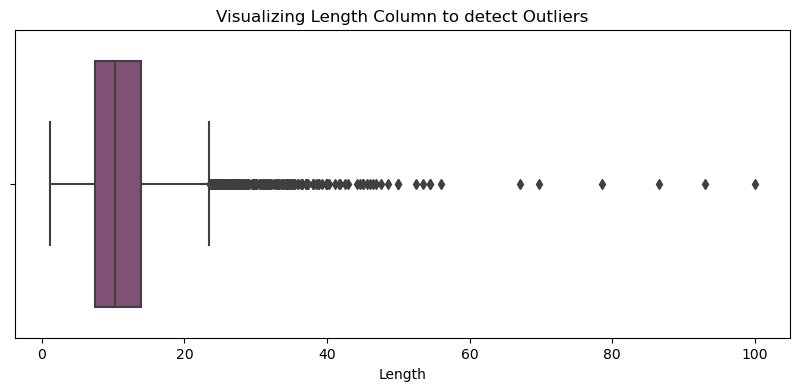

In [59]:
plt.figure(figsize=(10,4))
ax = sns.boxplot(x = numeric_data['Length'],color=my_colors[5])
ax.set_title('Visualizing Length Column to detect Outliers')
plt.show()

* As our Hypothesis is right, Length Feature have Outliers. we will remove it in future after looking at other columns first.

#### **Checking Width Column:**

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  


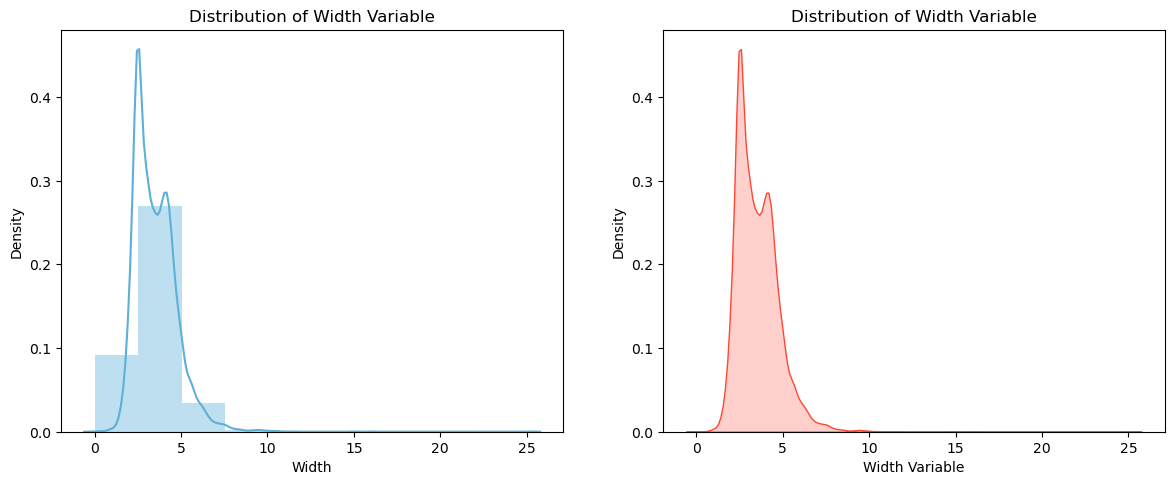

In [60]:
plt.figure(figsize=(22,24))
temp = numeric_data['Width']
x = pd.Series(temp,name='Width Variable')
plt.subplot(4,3,1)
ax = sns.distplot(temp,bins=10,color=my_colors[0])
ax.set_title("Distribution of Width Variable")
plt.subplot(4,3,2)
ax = sns.kdeplot(x,shade=True,color=my_colors[8])
ax.set_title('Distribution of Width Variable')
plt.show()


#### **Interpretation**

* We see that Width column is Not normalized and it is negatively skewed.

* We can say that it have Outliers.

* To Confirm Our Hypothesis that Width Column have outliers, we Use Boxplot to Confirm it


**Detect Outliers** in Width Column with **boxplot**

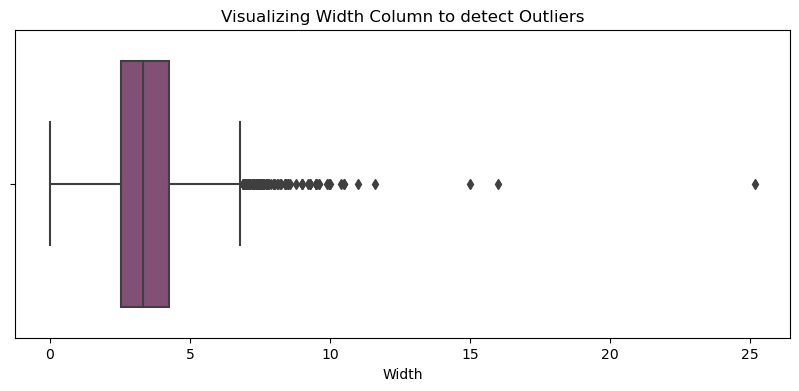

In [61]:
plt.figure(figsize=(10,4))
ax = sns.boxplot(x = numeric_data['Width'],color=my_colors[5])
ax.set_title('Visualizing Width Column to detect Outliers')
plt.show()

* As our Hypothesis is right, Width Feature have Outliers. we will remove it in future after looking at other columns first.

In [72]:
temp_data = numeric_data[numeric_data['Year Built'] != 0]

Text(1914, 750, 'Most of the Boats Manufactured AT 2019-2020')

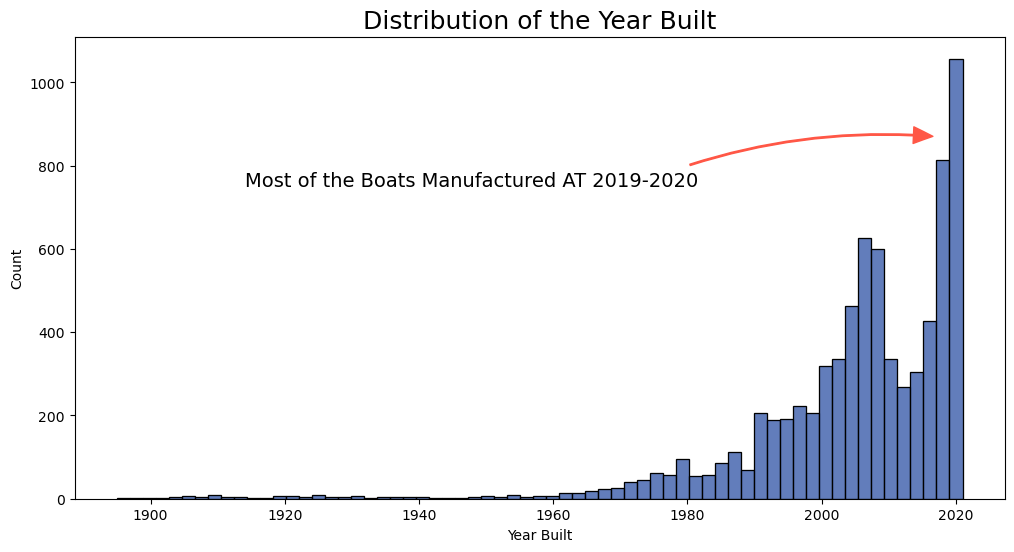

In [93]:
plt.figure(figsize=(12,6))
temp = temp_data['Year Built']
ax = sns.histplot(temp,color=my_colors[3])
ax.set_title('Distribution of the Year Built',fontsize=18)
style = "Simple, tail_width=1, head_width=12, head_length=14"
kw = dict(arrowstyle=style, color=my_colors[9])
arrow = patches.FancyArrowPatch((1980, 800), (2017,870),
                             connectionstyle="arc3,rad=-.10", **kw)
plt.gca().add_patch(arrow)

plt.text(x=1914, y=750, s=f"Most of the Boats Manufactured AT 2019-2020", 
         color="black", size=14)

## HELPER FUNCTION

In [10]:
def creation_of_currency(df):
    price = []
    for index in range(df.shape[0]):
        x = df.loc[index,'Price']
        curr, value = x.split(" ")
        value = float(value)
        if curr == 'EUR':
            value = value * 1.08 
            price.append(value)
        
        elif curr == 'CHF':
            value = value * 1.09 
            price.append(value)
        
        elif curr == 'DKK':
            value = value * 0.14
            price.append(value)
        
        elif curr == 'Â£':
            value = value * 1.21
            price.append(value)
    
    return price

## ON WHOLE DATASET

In [11]:
train_df = train_data.drop('Number of views last 7 days',axis=1)
test_df = test_data

size = train_data.shape[0]
data = pd.concat((train_df, test_df),ignore_index=True)

In [12]:
tota_price = creation_of_currency(data)
data['USD_PRICE'] = tota_price


data['USD_PRICE'].mean(axis=0)

325974.4375455097

## JUST ON TRAIN DTASET

In [13]:
total_price = creation_of_currency(train_data)
train_data['USD_PRICE'] = total_price
train_data['USD_PRICE'].mean(axis=0)

total_price = creation_of_currency(test_data)
test_data['USD_PRICE'] = total_price
test_data['USD_PRICE'].mean(axis=0)

320592.8186147624

In [14]:
train_data.loc[1,'Location'].split(" ")[0]

'Italy'

In [15]:
for index in range(train_data.shape[0]):
    x = str(train_data.loc[index,'Location']).split("»")[-1]

In [16]:
def feature_engineering_location(df):
    listt_count = []
    listt_region = []
    
    for index in range(df.shape[0]):
        
        listt_count.append(str(df.loc[index,'Location']).split(" ")[0])
        listt_region.append(str(df.loc[index,'Location']).split("»")[-1])
        
    df['Country'] = listt_count
    df['Region'] = listt_region
    
    return df


In [17]:
train_data = feature_engineering_location(train_data)
test_data = feature_engineering_location(test_data)

## Checking which country have highest listing views

In [138]:
train_data.groupby('Country')['Number of views last 7 days'].agg({"sum"}).sort_values(by=['sum'])

,sum
Country,
Jersey,46
Ireland,46
Lebanon,47
Gibraltar,52
Venezuela,64
...,...
France,95062
Netherlands,97980
Italy,171840


## Helper function

* we designed this to count the unique data by splitting the categorical features

In [18]:
def find_counts(df,col,type_name):
    
    count = 0
    for index in range(df.shape[0]):
        x = df.loc[index,col]
        y = str(x).split(",")
        if type_name in y:
            count = count + 1
    
    return count

In [19]:
find_counts(train_data,'Type','Diesel')

3651

In [141]:
find_counts(train_data,'Type','Display Model')

96

## Count of Unique Boat Types

In [142]:
train_data['Boat Type'].nunique()

114

In [143]:
find_counts(train_data,'Boat Type','Classic')

185

## Checking Which Manufacturer have highest mean

In [144]:
train_data.groupby('Manufacturer')['Number of views last 7 days'].agg({"mean"}).sort_values(by=['mean'])

,mean
Manufacturer,
Lamor power boats,20.0
Center Craft power boats,27.0
Gavazzi Luciano power boats,31.0
Premiere Yacht power boats,34.0
Ventus power boats,34.0
...,...
ATOMIX power boats,885.0
Bluewater Yachts power boats,888.0
Werner power boats,900.0


In [145]:
list = train_data['Boat Type'].str.split(",")
list

0        [Motor Yacht]
1         [Pilothouse]
2       [Fishing Boat]
3        [Motor Yacht]
4          [Flybridge]
             ...      
7905        [Bowrider]
7906         [Trawler]
7907      [Pilothouse]
7908     [Motor Yacht]
7909      [Pilothouse]
Name: Boat Type, Length: 7910, dtype: object

In [146]:
train_data['Boat Type'].value_counts()

Motor Yacht                      2197
Sport Boat                       1131
Flybridge                         934
Trawler                           547
Pilothouse                        500
                                 ... 
Cabin Boat,Classic,Trawler          1
Bowrider,Classic                    1
Cabin Boat,Pilothouse               1
Bowrider,Deck Boat,Water ski        1
Cabin Boat,Hardtop,Sport Boat       1
Name: Boat Type, Length: 114, dtype: int64

## Checking Which Country have lowest mean

In [147]:
train_data.groupby('Country')['Number of views last 7 days'].agg({"mean"}).sort_values(by=['mean'])

,mean
Country,
Ireland,46.0
Jersey,46.0
Lebanon,47.0
Gibraltar,52.0
Venezuela,64.0
...,...
Avenches,917.0
TravemÃ¼nde,1014.0
"ZÃ¼richse,",1017.0


In [148]:
train_data.groupby('Manufacturer')['Number of views last 7 days'].agg({"mean"}).sort_values(by=['mean'])

,mean
Manufacturer,
Lamor power boats,20.0
Center Craft power boats,27.0
Gavazzi Luciano power boats,31.0
Premiere Yacht power boats,34.0
Ventus power boats,34.0
...,...
ATOMIX power boats,885.0
Bluewater Yachts power boats,888.0
Werner power boats,900.0


In [149]:
train_data['Type'].value_counts()

Used boat,Diesel                3315
Used boat,Unleaded              1350
Used boat                       1186
new boat from stock,Unleaded     880
new boat from stock              511
new boat from stock,Diesel       224
new boat on order,Unleaded       131
Display Model,Unleaded            62
new boat on order,Diesel          51
new boat on order                 48
Diesel                            45
Used boat,Electric                19
Unleaded                          19
Display Model,Diesel              16
new boat from stock,Electric      16
Display Model                     12
Used boat,Gas                      8
Display Model,Electric             6
new boat from stock,Gas            1
new boat from stock,Hybrid         1
Used boat,Hybrid                   1
Electric                           1
Used boat,Propane                  1
Name: Type, dtype: int64

In [150]:
temp = train_data[train_data['Country'] == 'Germany']

temp['Boat Type'].value_counts()

Motor Yacht                                347
Sport Boat                                 313
Cabin Boat                                 226
Bowrider                                   109
Pilothouse                                  94
Trawler                                     89
Deck Boat                                   60
Flybridge                                   60
House Boat                                  36
Center console boat                         34
Hardtop                                     29
Runabout                                    20
Fishing Boat                                18
Classic                                     12
Launch                                      11
Wakeboard/Wakesurf                          10
Working Boat                                10
Offshore Boat                                8
Mega Yacht                                   7
Water ski                                    6
Classic,Runabout                             4
Cabin Boat,Sp

### **MORE EDA AND FEATURE ENGINEERING:**

In [20]:
def flag_creation(df):
    nan_cols = [col for col in df.columns if df[col].isnull().sum() != 0]
    for c in nan_cols:
        df[c+'_flag'] = np.where(df[c].isna() == True,1,0)
        
    return df

train_data = flag_creation(train_data)
test_data = flag_creation(test_data)

* The idea behind this technique is that it will present the Model some patterns regarding tackling the Nan Values.

In [152]:
# train_data.fillna(-999,inplace=True)
# test_data.fillna(-999, inplace=True)

#### **Transformation:**

* As we see that on above cells we have two columns which contain Outliers and we have to tackle them by using some techniques.
* I think the basic technique is to clip the values which exceeds.

In [21]:
def Transformation(df):
    df = df.drop(df[df['Length'] > 64].index,axis=0)
    df = df.drop(df[df['Width'] > 15].index,axis=0)
    
    return df

train_data = Transformation(train_data)

### EXPLORE PRICE COLUMN:

* We Excluded the USD Price from the Price column by exchanging it but their is an another import point to notice which is currency type also. Maybe this will help our Model to find patterns.

In [22]:
def create_currency_type(df):
    df['Currency_Type'] = df['Price'].apply(lambda x: x.split(" ")[0])
    
    return df

train_data = create_currency_type(train_data)
test_data = create_currency_type(test_data)

In [155]:
def plot(df,col,col1):
    ax = px.histogram(df,x=col,color=col1,width=500,height=300)
    ax.show()

In [156]:
plot(train_data,'Number of views last 7 days','Currency_Type')

In [184]:
train_data.groupby("Country")['Number of views last 7 days'].agg({'sum'}).reset_index().sort_values(by=['sum'],ascending=False)[0:10]

,Country,sum
84,Switzerland,299764
27,Germany,234821
38,Italy,171703
56,Netherlands,97241
24,France,95062
15,Croatia,74135
79,Spain,64078
94,United,17824
19,Denmark,17709
4,Austria,13063


In [202]:
train_data.isnull().sum()

ID                                0
Price                             0
Boat Type                         0
Manufacturer                   1080
Type                              6
Year Built                        0
Length                            5
Width                            43
Material                       1386
Location                         22
Number of views last 7 days       0
USD_PRICE                         0
Country                           0
Manufacturer_flag                 0
Type_flag                         0
Length_flag                       0
Width_flag                        0
Material_flag                     0
Location_flag                     0
Currency_Type                     0
dtype: int64

In [232]:
print('LOW USD : ', train_data['USD_PRICE'].quantile(0.25))
print("MEDIUM USD : ",train_data['USD_PRICE'].quantile(0.50))
print("HIGH USD : ",train_data['USD_PRICE'].quantile(0.75))

LOW USD :  46332.0
MEDIUM USD :  99360.0
HIGH USD :  261360.00000000003


In [23]:
def Price_creation(df):
    
    df['LOW PRICE'] = df['USD_PRICE'].apply(lambda x: 1 if x>0.0 and x<=4650.0 else 0)
    df['MEDIUM PRICE'] = df['USD_PRICE'].apply(lambda x: 1 if x>4650.0 and x<=99360 else 0)
    df['HIGH PRICE'] = df['USD_PRICE'].apply(lambda x: 1 if x>99360 and x<=261360.0 else 0)
    
    return df

In [24]:
train_data = Price_creation(train_data)
test_data = Price_creation(test_data)

In [35]:
def feature_eng_year(df):
    df['Year Built'] = df['Year Built'].replace(0,df['Year Built'].mode()[0])
    
    # This will represent how much old the boat is.
    
    df['Age_of_Boat'] = train_data['Year Built'].max() - train_data['Year Built']
    
    return df


train_data = feature_eng_year(train_data)
test_data = feature_eng_year(test_data)

In [39]:
def feature_eng_type_and_boatType(df):
    df[['b_type_1','b_type_2','b_type_3']] = df['Boat Type'].str.split(",", expand=True)
    
    df[['boat_condition','boat_fuel']] = df['Type'].str.split(",",expand=True)
    
    return df


train_data = feature_eng_type_and_boatType(train_data)
test_data = feature_eng_type_and_boatType(test_data)